In [119]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
!pip install ucimlrepo

In [120]:
from ucimlrepo import fetch_ucirepo
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# 1️⃣ Cargar dataset
bank_marketing = fetch_ucirepo(id=222)

X = bank_marketing.data.features
y = bank_marketing.data.targets

# 2️⃣ Combinar para procesar todo junto si es necesario
df = pd.concat([X, y], axis=1)

# 3️⃣ Revisar información general
print("📊 Info inicial:")
print(df.info())

# 4️⃣ Revisar si hay datos faltantes o duplicados
print("\n🔍 Valores nulos por columna:")
print(df.isnull().sum())

print("\n🧩 Filas duplicadas:", df.duplicated().sum())

# Si hay duplicados, los eliminamos:
df = df.drop_duplicates()

# 5️⃣ Identificar columnas categóricas
cat_cols = df.select_dtypes(include=['object']).columns
print("\n📋 Columnas categóricas:", list(cat_cols))

# 6️⃣ Convertir variables categóricas a numéricas
encoder = LabelEncoder()
for col in cat_cols:
    df[col] = encoder.fit_transform(df[col])

# 7️⃣ Confirmar conversión
print("\n✅ Tipos de datos después de convertir:")
print(df.dtypes)

# 8️⃣ Separar nuevamente en X e y
X = df.drop(columns=y.columns)
y = df[y.columns]

📊 Info inicial:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   age          45211 non-null  int64 
 1   job          44923 non-null  object
 2   marital      45211 non-null  object
 3   education    43354 non-null  object
 4   default      45211 non-null  object
 5   balance      45211 non-null  int64 
 6   housing      45211 non-null  object
 7   loan         45211 non-null  object
 8   contact      32191 non-null  object
 9   day_of_week  45211 non-null  int64 
 10  month        45211 non-null  object
 11  duration     45211 non-null  int64 
 12  campaign     45211 non-null  int64 
 13  pdays        45211 non-null  int64 
 14  previous     45211 non-null  int64 
 15  poutcome     8252 non-null   object
 16  y            45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB
None

🔍 Valores nulos por columna:
age       

In [121]:
X.drop(['job','poutcome', 'default', 'previous'], axis=1)

,age,marital,education,balance,housing,loan,contact,day_of_week,month,duration,campaign,pdays
0,58,1,2,2143,1,0,2,5,8,261,1,-1
1,44,2,1,29,1,0,2,5,8,151,1,-1
2,33,1,1,2,1,1,2,5,8,76,1,-1
3,47,1,3,1506,1,0,2,5,8,92,1,-1
4,33,2,3,1,0,0,2,5,8,198,1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,1,2,825,0,0,0,17,9,977,3,-1
45207,71,0,0,1729,0,0,0,17,9,456,2,-1
45208,72,1,1,5715,0,0,0,17,9,1127,5,184
45209,57,1,1,668,0,0,1,17,9,508,4,-1


In [122]:
X.values

array([[ 58,   4,   1, ...,  -1,   0,   3],
       [ 44,   9,   2, ...,  -1,   0,   3],
       [ 33,   2,   1, ...,  -1,   0,   3],
       ...,
       [ 72,   5,   1, ..., 184,   3,   2],
       [ 57,   1,   1, ...,  -1,   0,   3],
       [ 37,   2,   1, ..., 188,  11,   1]])

In [147]:
y['y'].values

array([0, 0, 0, ..., 1, 0, 0])

In [146]:
y.values

array([[0],
       [0],
       [0],
       ...,
       [1],
       [0],
       [0]])

In [126]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [127]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [128]:
model = Sequential([
    Dense(8, input_dim=X_train.shape[1], activation='relu'),
    Dense(4, activation='relu'),
    Dense(1, activation='sigmoid')])
optimizer = Adam(learning_rate=0.001)
model.compile(
    optimizer= optimizer,
    loss='binary_crossentropy',
    metrics=['accuracy']
)

model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_9 (Dense)                 │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 4)              │            36 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1)              │             5 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 177 (708.00 B)

 Trainable params: 177 (708.00 B)

 Non-trainable params: 0 (0.00 B)

In [129]:
history = model.fit(
    X_train, y_train,
    validation_split=0.3,
    epochs=50,
    batch_size=32,
    verbose=1
)

Epoch 1/50
792/792 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.7798 - loss: 0.5097 - val_accuracy: 0.8837 - val_loss: 0.2626
Epoch 2/50
792/792 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8853 - loss: 0.2558 - val_accuracy: 0.8837 - val_loss: 0.2491
Epoch 3/50
792/792 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8854 - loss: 0.2501 - val_accuracy: 0.8941 - val_loss: 0.2440
Epoch 4/50
792/792 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8893 - loss: 0.2440 - val_accuracy: 0.9002 - val_loss: 0.2398
Epoch 5/50
792/792 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8929 - loss: 0.2380 - val_accuracy: 0.9007 - val_loss: 0.2379
Epoch 6/50
792/792 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8930 - loss: 0.2403 - val_accuracy: 0.9042 - val_loss: 0.2364
Epoch 7/50
792/792 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8943 - loss: 0.2438 - val_accuracy: 0.9034 - val_loss: 0.2359
Epoch 8/50
792/792 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8948 - loss: 0.2378 - val_accuracy: 0.

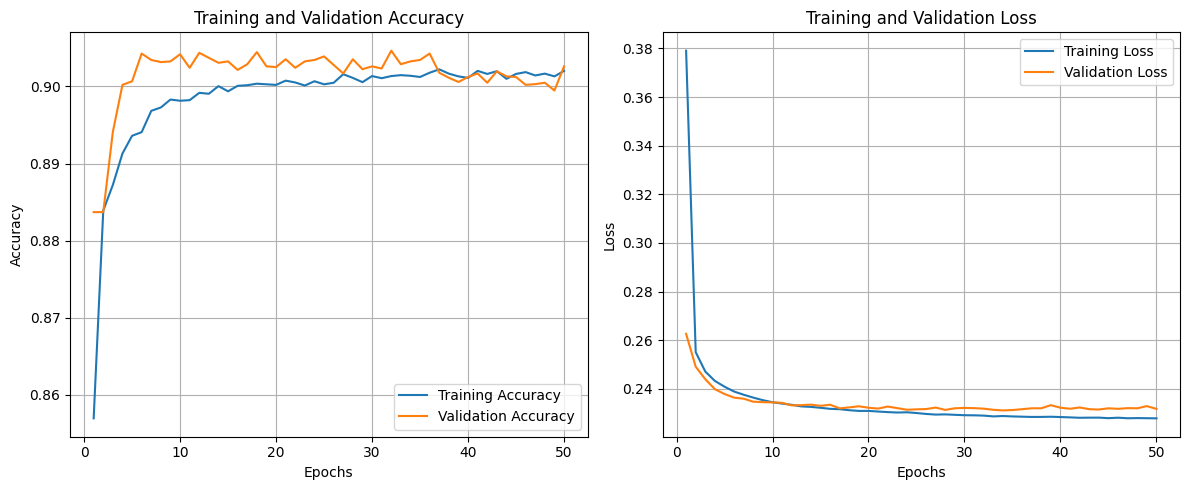

In [130]:
epochs = range(1, len(history.history['accuracy']) + 1)

plt.figure(figsize=(12, 5))

# Accuracy
plt.subplot(1, 2, 1)
plt.plot(epochs, history.history['accuracy'], label='Training Accuracy')
plt.plot(epochs, history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# Loss
plt.subplot(1, 2, 2)
plt.plot(epochs, history.history['loss'], label='Training Loss')
plt.plot(epochs, history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


In [131]:
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
print(f"Accuracy en datos de prueba: {test_acc:.4f}")

Accuracy en datos de prueba: 0.8949


283/283 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


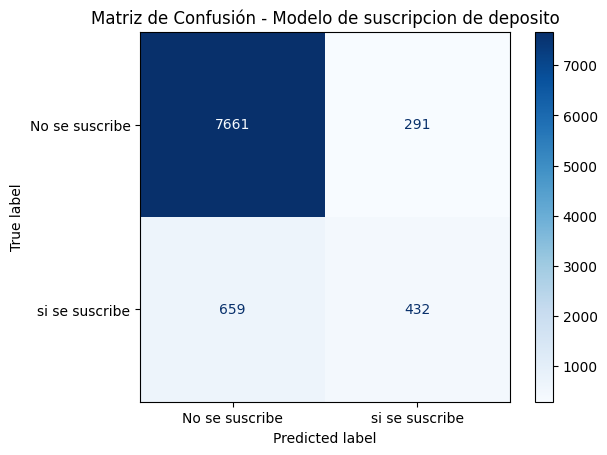

In [132]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# 🔹 Paso 1: Obtener las predicciones del modelo
predictions = model.predict(X_test)

# Convertimos las probabilidades (0 a 1) a etiquetas binarias (0 o 1)
pred_labels = (predictions > 0.5).astype(int).flatten()

# 🔹 Paso 2: Calcular la matriz de confusión
cm = confusion_matrix(y_test, pred_labels)

# 🔹 Paso 3: Mostrarla gráficamente
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No se suscribe', 'si se suscribe'])
disp.plot(cmap='Blues', values_format='d')  # 'd' muestra enteros
plt.title("Matriz de Confusión - Modelo de suscripcion de deposito")
plt.show()

In [135]:
model.save('Suscripcion.keras')

In [136]:
modelo_cargado_tf = tf.keras.models.load_model('Suscripcion.keras')
#modelo_cargado_tf = tf.keras.models.load_model('ModeloDiabetes.')

In [161]:
X.values[45208]

array([  72,    5,    1,    1,    0, 5715,    0,    0,    0,   17,    9,
       1127,    5,  184,    3,    2])

In [157]:
y['y'].values[45208]

np.int64(1)

In [164]:
p = np.array([72,    5,    1,    1,    0, 5715,    0,    0,    0,   17,    9, 1127,    5,  184,    3,    2])

p = p.reshape(1, -1)  # o p[np.newaxis, :]
p = scaler.transform(p)
prediccion = round(modelo_cargado_tf.predict(p)[0][0])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [165]:
prediccion

1